In [89]:
import os.path as osp
import data.citylearn_challenge_2022_phase_1 as competition_data
import pandas as pd

In [90]:
import csv
action_file_path = osp.join(osp.dirname(competition_data.__file__), 'perfect_actions.csv')

col_names = ["month",
    "day_type",
    "hour",
    "outdoor_dry_bulb_temperature",
    "outdoor_dry_bulb_temperature_predicted_6h",
    "outdoor_dry_bulb_temperature_predicted_12h",
    "outdoor_dry_bulb_temperature_predicted_24h",
    "outdoor_relative_humidity",
    "outdoor_relative_humidity_predicted_6h",
    "outdoor_relative_humidity_predicted_12h",
    "outdoor_relative_humidity_predicted_24h",
    "diffuse_solar_irradiance",
    "diffuse_solar_irradiance_predicted_6h",
    "diffuse_solar_irradiance_predicted_12h",
    "diffuse_solar_irradiance_predicted_24h",
    "direct_solar_irradiance",
    "direct_solar_irradiance_predicted_6h",
    "direct_solar_irradiance_predicted_12h",
    "direct_solar_irradiance_predicted_24h",
    "carbon_intensity",
    "non_shiftable_load",
    "solar_generation",
    "electrical_storage_soc",
    "net_electricity_consumption",
    "electricity_pricing",
    "electricity_pricing_predicted_6h",
    "electricity_pricing_predicted_12h",
    "electricity_pricing_predicted_24h",
    "action",
    "consumption_hour1",
    "consumption_hour2",
    "consumption_hour3"]

with open(action_file_path,newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open(action_file_path,'w',newline='') as f:
    w = csv.writer(f)
    w.writerow(col_names)
    w.writerows(data)



In [93]:
df = pd.read_csv(action_file_path)
df_original = df
df.head()

,month,day_type,hour,outdoor_dry_bulb_temperature,outdoor_dry_bulb_temperature_predicted_6h,outdoor_dry_bulb_temperature_predicted_12h,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,...,carbon_intensity,non_shiftable_load,solar_generation,electrical_storage_soc,net_electricity_consumption,electricity_pricing,electricity_pricing_predicted_6h,electricity_pricing_predicted_12h,electricity_pricing_predicted_24h,action
0,7,7,24,20.0,18.3,22.8,20.0,84.0,81.0,68.0,...,0.170724,2.275800e+00,0.0,0.0,2.275800e+00,0.22,0.22,0.22,0.22,0.0
1,7,7,24,20.0,18.3,22.8,20.0,84.0,81.0,68.0,...,0.170724,2.188750e+00,0.0,0.0,2.188750e+00,0.22,0.22,0.22,0.22,0.0
2,7,7,24,20.0,18.3,22.8,20.0,84.0,81.0,68.0,...,0.170724,1.009623e-07,0.0,0.0,1.009623e-07,0.22,0.22,0.22,0.22,0.0
3,7,7,24,20.0,18.3,22.8,20.0,84.0,81.0,68.0,...,0.170724,2.819150e+00,0.0,0.0,2.819150e+00,0.22,0.22,0.22,0.22,0.0
4,7,7,24,20.0,18.3,22.8,20.0,84.0,81.0,68.0,...,0.170724,7.714333e-01,0.0,0.0,7.714333e-01,0.22,0.22,0.22,0.22,0.0


In [96]:
df = df[["month",
    "day_type",
    "hour",
    "non_shiftable_load",
    "solar_generation",
    "electrical_storage_soc",
    "net_electricity_consumption",
    "action",
    "consumption_hour1",
    "consumption_hour2",
    "consumption_hour3"]]
df.head()

,month,day_type,hour,non_shiftable_load,solar_generation,electrical_storage_soc,net_electricity_consumption,action
0,7,7,24,2.275800e+00,0.0,0.0,2.275800e+00,0.0
1,7,7,24,2.188750e+00,0.0,0.0,2.188750e+00,0.0
2,7,7,24,1.009623e-07,0.0,0.0,1.009623e-07,0.0
3,7,7,24,2.819150e+00,0.0,0.0,2.819150e+00,0.0
4,7,7,24,7.714333e-01,0.0,0.0,7.714333e-01,0.0


In [97]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
groups = np.array([i%5 for i in range(len(df))])
logo = LeaveOneGroupOut()
y = df[["action"]]
X = df.drop(["action"], axis=1)
cv_iter = list(logo.split(X, y, groups))
print(len(X))
print(len(groups))

43795
43795


In [98]:
# tpot.TPOTRegressor(generations=100, population_size=100,
#                      offspring_size=None, mutation_rate=0.9,
#                      crossover_rate=0.1,
#                      scoring='neg_mean_squared_error', cv=5,
#                      subsample=1.0, n_jobs=1,
#                      max_time_mins=None, max_eval_time_mins=5,
#                      random_state=None, config_dict=None,
#                      template=None,
#                      warm_start=False,
#                      memory=None,
#                      use_dask=False,
#                      periodic_checkpoint_folder=None,
#                      early_stop=None,
#                      verbosity=0,
#                      disable_update_check=False)

In [ ]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y)

tpot_regressor = TPOTRegressor(generations=5, population_size=20, verbosity=2, n_jobs=-1, cv=cv_iter)
tpot_regressor.fit(X, y)
print(tpot_regressor.score(X, y))

C:\Users\philip\Storage\Epoch\citylearn-2022-starter-kit\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]

In [ ]:
tpot_regressor.export('tpot_exported_pipeline.py')

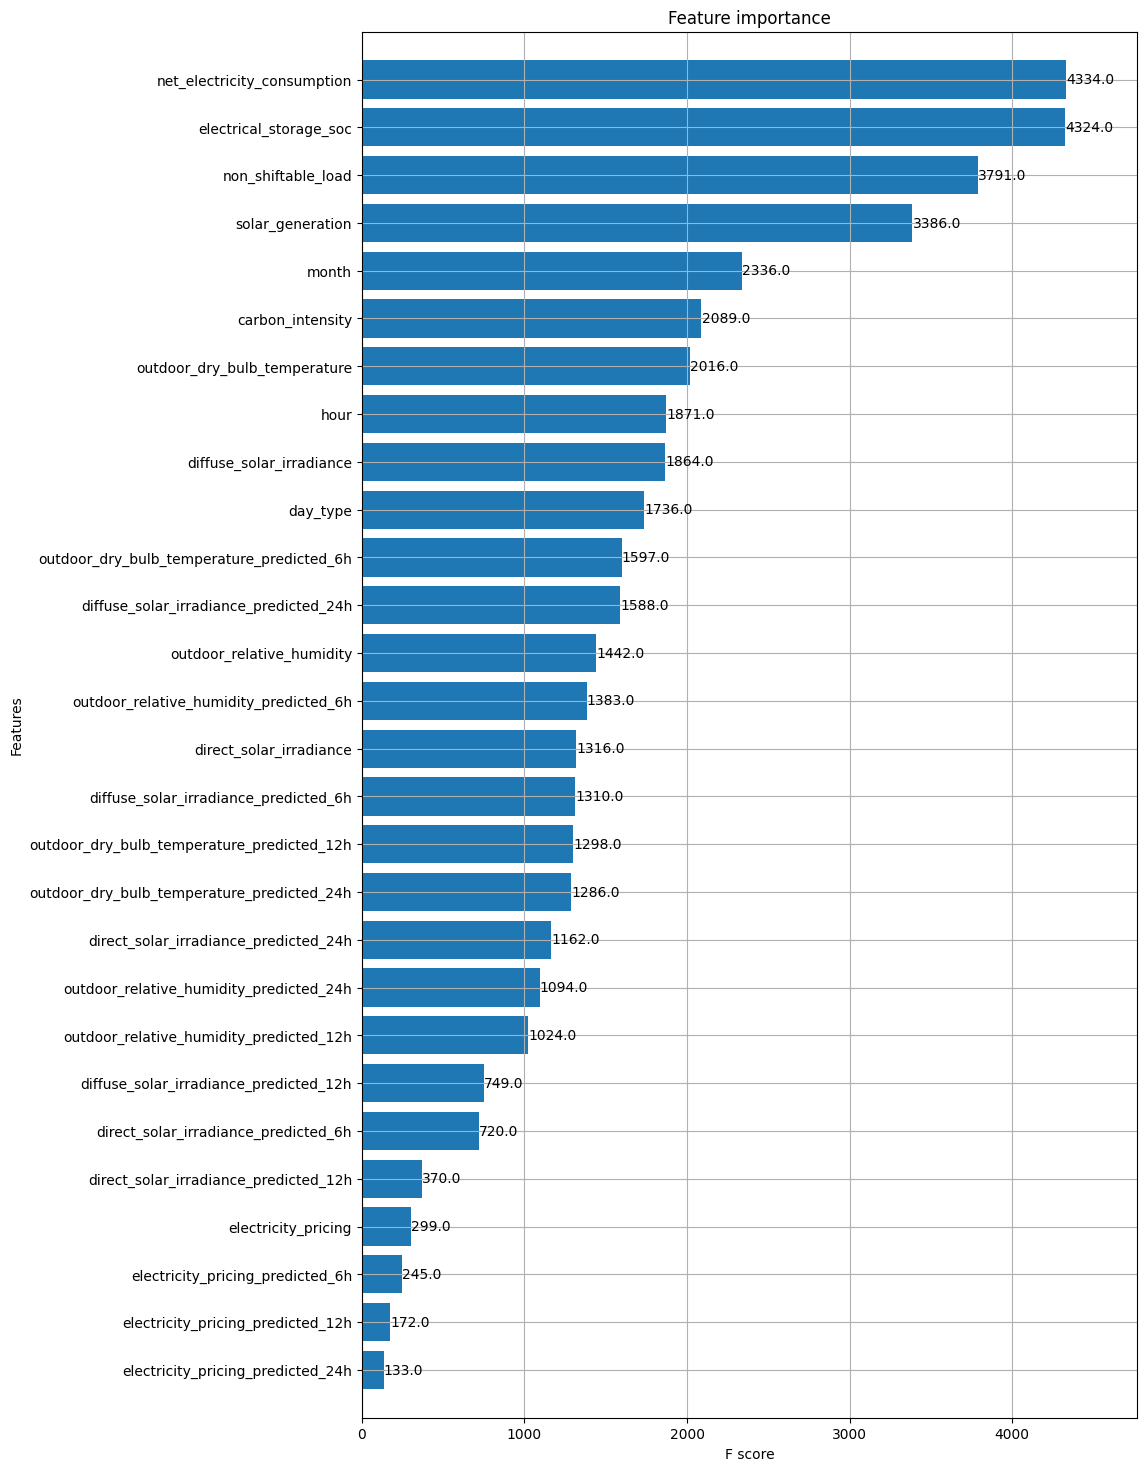

In [95]:
import xgboost as xgb

train_y = y
train_X = df_original.drop(["action"], axis=1)
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'subsample': 1.0,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
remain_num = 99


from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,18))
xgb.plot_importance(model, max_num_features=remain_num, height=0.8, ax=ax)
plt.show()